In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from sklearn import preprocessing
print(os.listdir("../input"))


['data.dat', 'data.csv', 'output.csv']


In [56]:
Housing_Data1=pd.read_csv("../input/output.csv")
Housing_Data1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [57]:
Housing_Data1.shape

(4600, 18)

In [58]:
#Checking for null values
Housing_Data1.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [59]:
import copy
Housing_Data2=copy.deepcopy(Housing_Data1)
Housing_Data2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [60]:
#Apply standardization
Housing_Data3=Housing_Data2[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']]
Housing_Data3=(Housing_Data3-Housing_Data3.mean())/Housing_Data3.std()
Housing_Data3.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,-0.423817,-0.441074,-0.843112,-0.829668,-0.193413,-0.022414,-0.084995,-0.309161,-0.667040,-0.565162,-0.672391,-0.530956,1.221538
1,3.249245,1.759513,0.432754,1.568687,-0.161700,0.906456,-0.084995,4.829554,2.286168,1.789365,-0.069121,-1.674511,-0.825604
2,-0.372384,-0.441074,-0.205179,-0.217101,-0.080969,-0.951284,-0.084995,-0.309161,0.809564,0.119158,-0.672391,-0.160982,-0.825604
3,-0.234046,-0.441074,0.113788,-0.144424,-0.190125,-0.951284,-0.084995,-0.309161,0.809564,-0.959517,1.482145,-0.261884,-0.825604
4,-0.003481,0.659220,0.432754,-0.206719,-0.121293,-0.951284,-0.084995,-0.309161,0.809564,-0.797135,1.051238,0.175357,1.208264


In [61]:
#Split data in to training and test dataset


X = Housing_Data3.as_matrix(['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated'])
y = Housing_Data3['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=10)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)
       #lets scale the data
X = Housing_Data3.as_matrix(['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated'])
y = Housing_Data3['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=10)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)
X_test.shape,X_train.shape,y_train.shape,y_test.shape

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


((2070, 12), (2530, 12), (2530,), (2070,))

In [62]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
#let us predict
y_pred=model.predict(X_test)
print (model.score(X_test, y_test))

0.47415289620476636


In [63]:
y_pred.shape

(2070,)

In [64]:
#Mean Square error of the prediction
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root mean squared error is {rmse}")


Root mean squared error is 0.4535937655479454


In [65]:
#Initiating Gradient Descent calculation
Housing_Data4=Housing_Data2[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']]
Housing_Data4.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [66]:
Housing_Data4=(Housing_Data4-Housing_Data4.mean())/Housing_Data4.std()
x=Housing_Data4[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']]
y=Housing_Data4['price']    



                 

In [67]:
x = np.c_[np.ones(x.shape[0]), x] 


In [68]:
#GRADIENT DESCENT

alpha = 0.01 #Step size
iterations = 12000 #No. of iterations
m = y.size #No. of data points
#y.size
np.random.seed(123) #Set the seed
theta = np.random.rand(13) #Pick some random values to start with

In [69]:
#GRADIENT DESCENT
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    prediction_list=[]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        prediction_list.append(prediction)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        #print(theta)
        past_thetas.append(theta)
        
    return prediction_list,past_thetas, past_costs,error

#Pass the relevant variables to the function and get the new values back...
prediction_list,past_thetas, past_costs,error = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
#print("error:",error)



In [70]:
#print("prediction_list:",prediction_list)

In [71]:
MSE_GD = ((prediction_list[-1]-y)**2).mean()  #From Gradient Descent
RMSE_GD=np.sqrt(MSE_GD)
print('Root Mean Square Error from Gradient Descent prediction : {}'.format(round(RMSE_GD,3)))


Root Mean Square Error from Gradient Descent prediction : 0.884


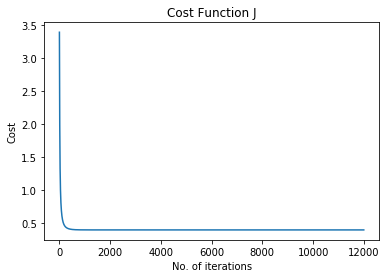

In [72]:
#Plot the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()